# CS 178 HW2

#### Malav Pandya
Student ID: 91044866

## Problem 1: Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

### (a)

In [2]:
data = np.genfromtxt("data/curve80.txt",delimiter=None) # load text file
X = data[:,0]
X = X[:, np.newaxis]
Y = data[:,1]
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75)    # split data set 75/25

### (b)

In [3]:
lr = ml.linear.linearRegress( Xtr, Ytr ); # create and train model
xs = np.linspace(0,10,200); # densely sample possible x-values
xs = xs[:,np.newaxis] # force "xs" to be an Mx1 matrix
ys = lr.predict( xs ); # make predictions at xs

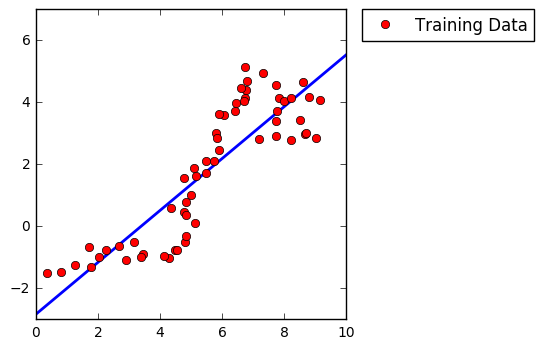

In [4]:
plt.rcParams['figure.figsize'] = (4.0, 4.0);
plt.figure(1);
plt.axis([0,10,-3,7]);
plt.plot(xs, ys, 'b-', linewidth = 2); 
plt.plot(Xtr, Ytr, 'ro', label = 'Training Data');
plt.legend(
    bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, numpoints = 1);
plt.show();

In [5]:
theta = lr.theta;
theta = theta[0];
print(theta);   #Print lin. coefficients

[-2.82765049  0.83606916]


It is clear that line begins around y value -2.83 and the slope of the line is close to one matching the theta value ≈ .83. Thereby the theta values match the plot. 

In [6]:
Ytr = Ytr[:,np.newaxis];
Yte = Yte[:,np.newaxis];

### MSE on Training Data:

In [7]:
YtrHat = lr.predict(Xtr); # make predictions on the training data
eTr = (Ytr - YtrHat);
JTr = (eTr.T.dot( eTr ) / len(Ytr));  # Mse on training data
print(JTr[0][0]);

1.12771195561


### MSE on Testing Data:

In [8]:
YteHat = lr.predict(Xte);
eTe = (Yte - YteHat);
JTe = (eTe.T.dot( eTe ) / len(Yte)); #mse on test data
print(JTe[0][0]);

2.24234920301


### (c)

#### (1)

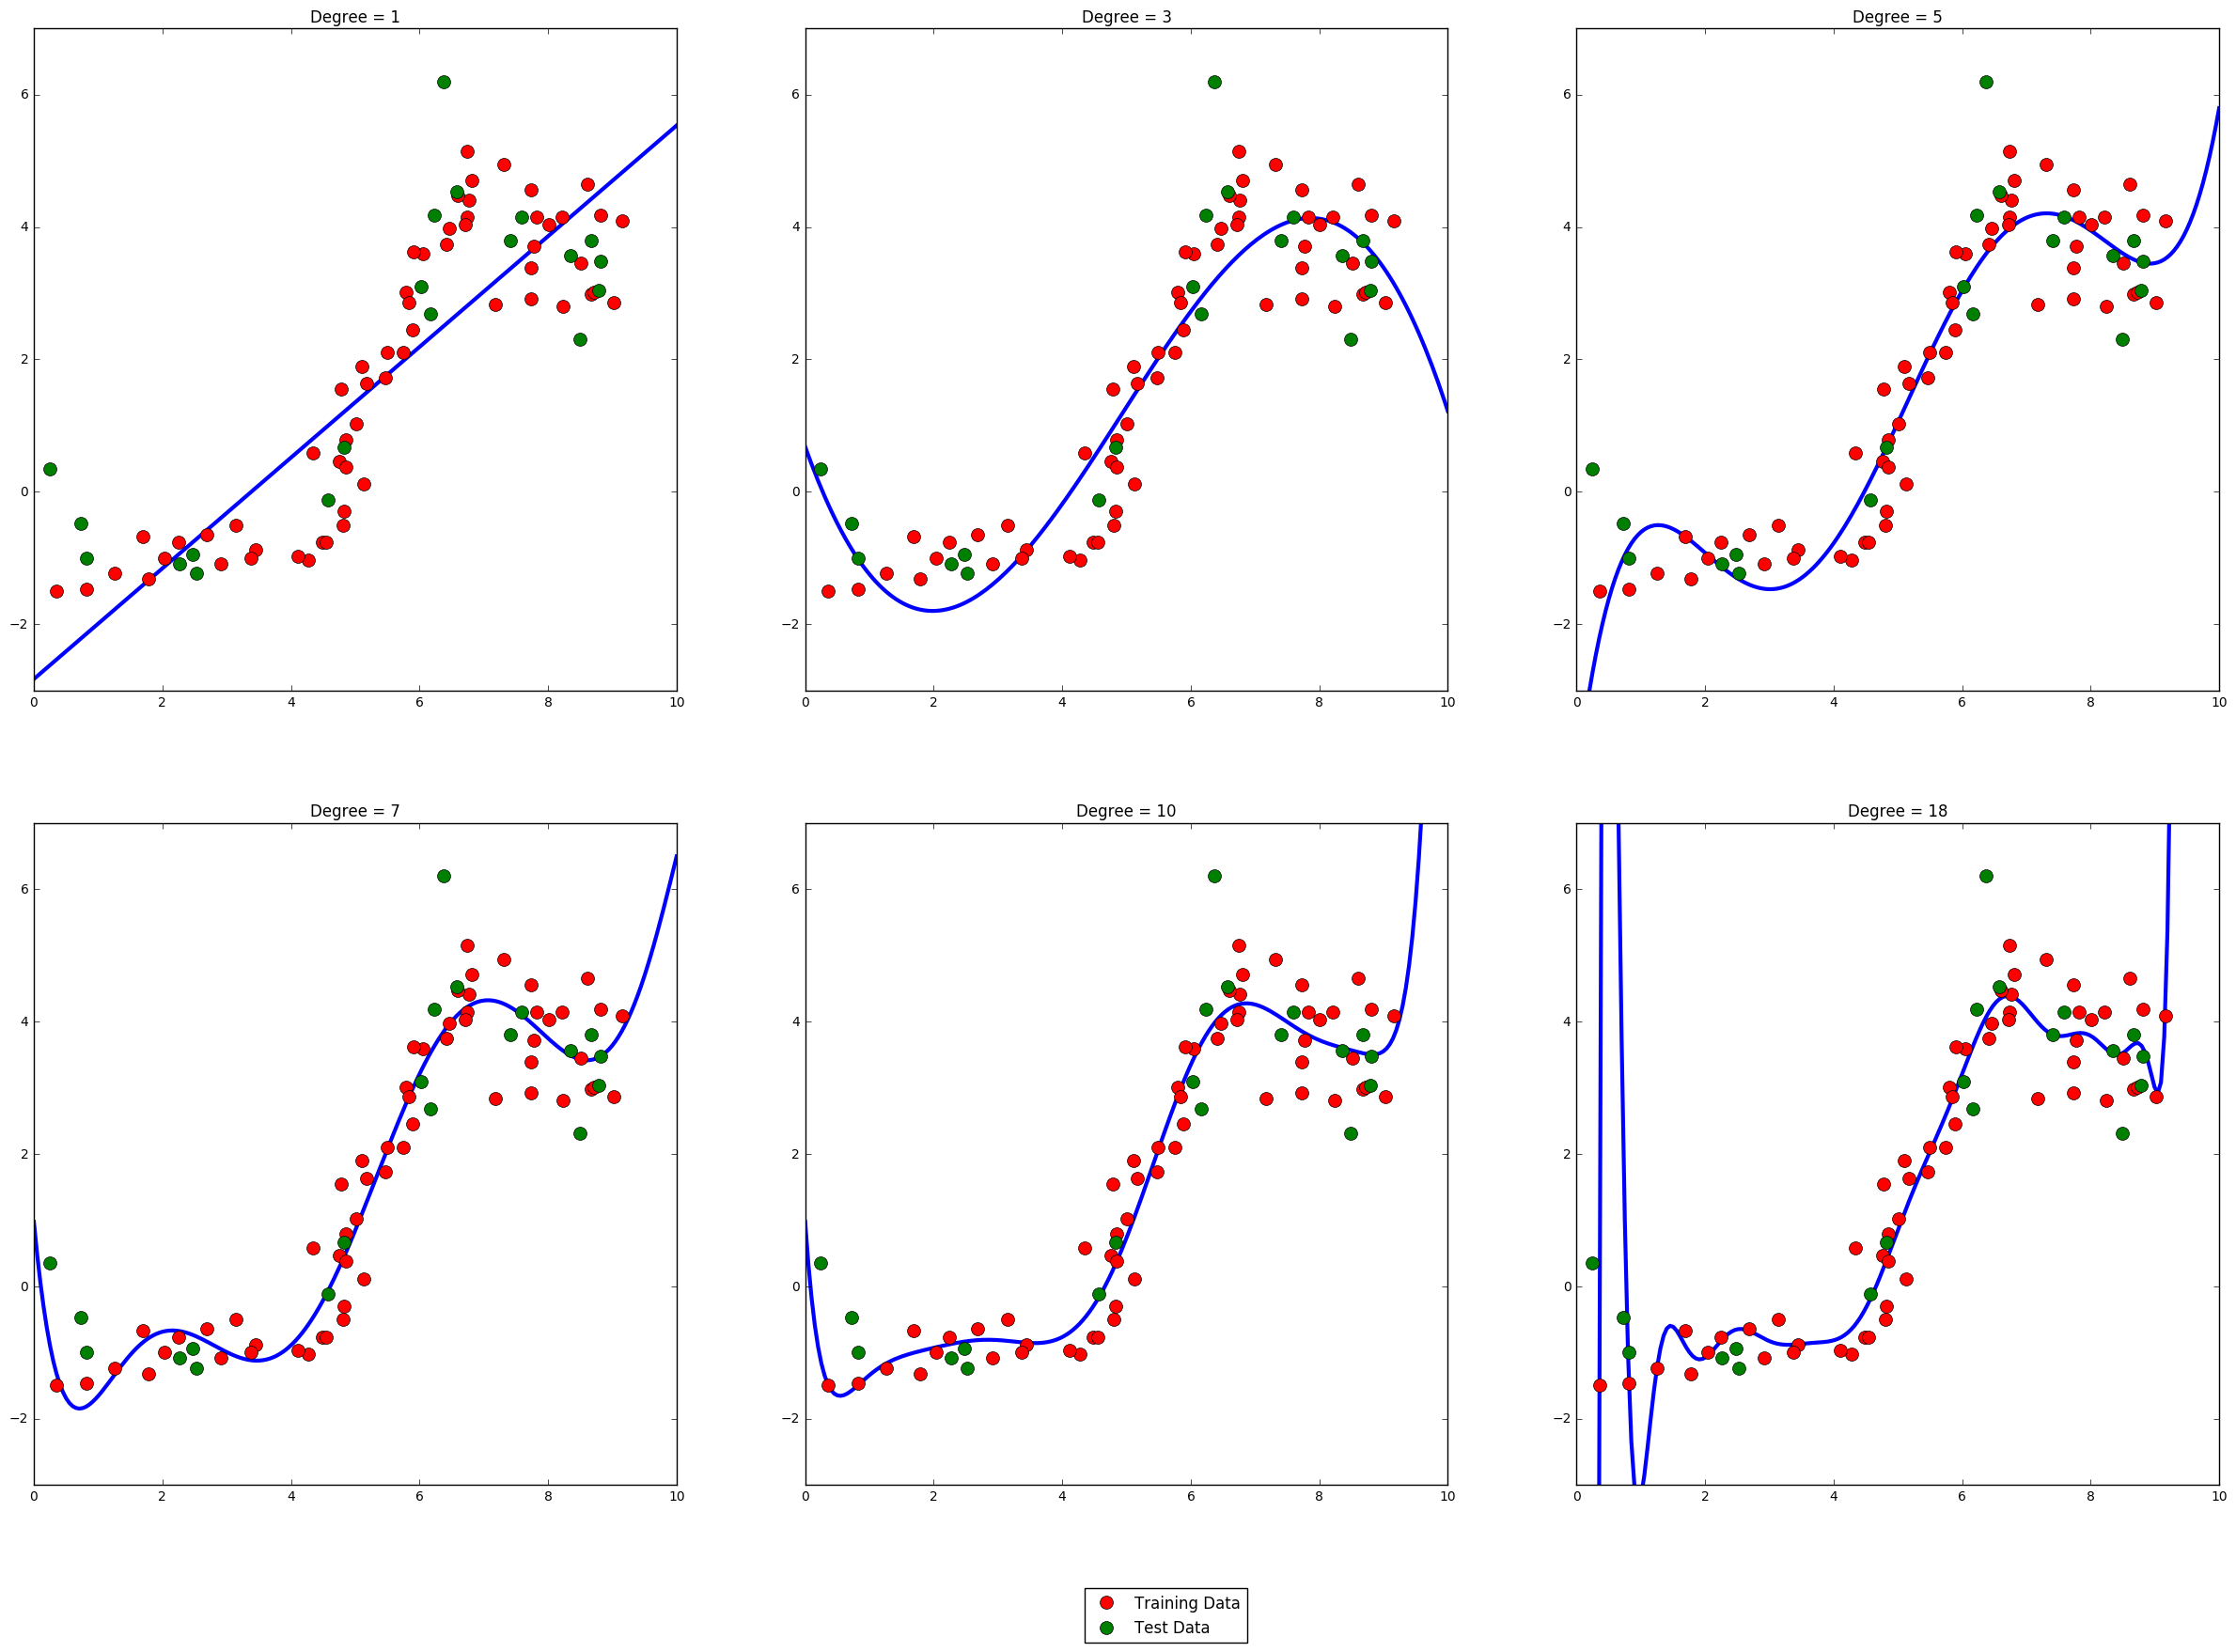

In [9]:
plt.figure(2);
plt.rcParams['figure.figsize'] = (30.0, 20.0);
fig,sub = plt.subplots(2,3);

degree = [1, 3, 5, 7, 10, 18];
k = 0;
j = 0;

for k,i in enumerate(degree):
    XtrP = ml.transforms.fpoly(Xtr, i, bias=False);
    XtrP,params = ml.transforms.rescale(XtrP);
    Phi = lambda X: ml.transforms.rescale( 
        ml.transforms.fpoly(X, i,False), params)[0];
    lr = ml.linear.linearRegress( Phi(Xtr), Ytr ); # train model
    
    if(k > 2):
        j = 1;
        k = k - 3;
            
    YhatTrain = lr.predict(Phi(xs)); # predict on training data
    sub[j][k].set_title("Degree = " + str(i));
    sub[j][k].plot(xs,YhatTrain, 'b-', linewidth = 3);
    sub[j][k].plot(Xtr, Ytr, 'ro', label = 'Training Data', ms = 10);
    sub[j][k].plot(Xte, Yte, 'go', label = 'Test Data', ms = 10);
    sub[j][k].axis([0,10,-3,7]);

plt.legend(borderaxespad=0, prop={'size':16});
plt.legend(bbox_to_anchor=(-.5, -.25), loc=4, numpoints = 1);
plt.show();

#### (2)

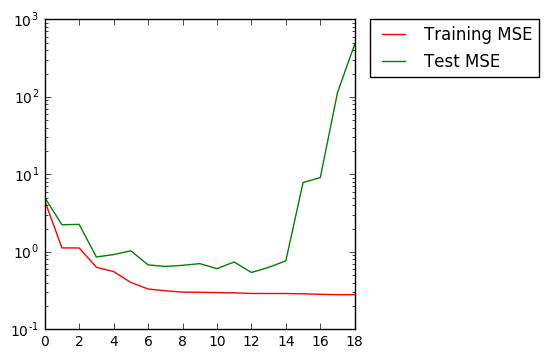

In [10]:
JaTr = [0]*(19);
JaTe = [0]*(19);
i = 0;    
for i in range(19):
    XtrP = ml.transforms.fpoly(Xtr, i, bias=False);
    XtrP,params = ml.transforms.rescale(XtrP);
    Phi = lambda X: ml.transforms.rescale( 
        ml.transforms.fpoly(X, i,False), params)[0];
    lr = ml.linear.linearRegress( Phi(Xtr), Ytr ); # train model
    
    YtrHat = lr.predict(Phi(Xtr));
    eTr = Ytr - YtrHat;
    JTr = eTr.T.dot( eTr ) / len(Ytr);
    JaTr[i] = JTr[0][0];
    
    YteHat = lr.predict(Phi(Xte));
    eTe = Yte - YteHat;
    JTe = eTe.T.dot( eTe ) / len(Yte); 
    JaTe[i] = JTe[0][0];

plt.rcParams['figure.figsize'] = (4.0, 4.0)
plt.figure();
plt.semilogy(JaTr, label = 'Training MSE', color = 'r' );
plt.semilogy(JaTe, label = 'Test MSE', color = 'g' );
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax = plt.axis();
plt.show();

## Problem 2: Cross-validation

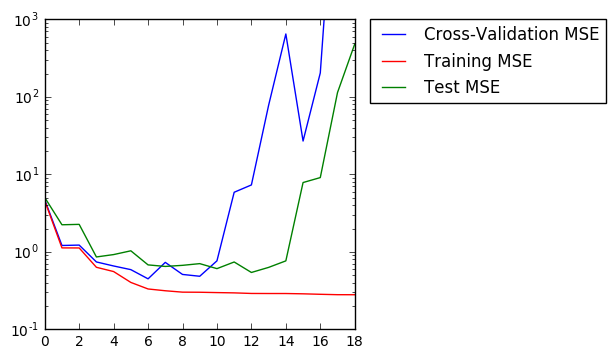

In [11]:
nFolds = 5;
J = [0] * 5;

Jmean = [0] * 19;

plt.figure();
i = 0;
for i in range(19):
    
    for iFold in range(nFolds):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,nFolds,iFold);
        XtrP = ml.transforms.fpoly(Xti, i, bias=False);
        XtrP,params = ml.transforms.rescale(XtrP);
        Phi = lambda X: ml.transforms.rescale( 
            ml.transforms.fpoly(X, i,False), params)[0];
        lr = ml.linear.linearRegress( XtrP, Yti ); # train model
        
        J[iFold] = lr.mse(Phi(Xvi), Yvi); #calculate the MSE

    Jmean[i] = np.mean(J);

plt.semilogy(Jmean, label = 'Cross-Validation MSE');
plt.semilogy(JaTr, label = 'Training MSE', color = 'r' );
plt.semilogy(JaTe, label = 'Test MSE', color = 'g' );
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.axis(ax);
plt.show();

Degree = 6 has the minimum cross-validation error. 

The MSE estimated on the cross-validation is close to and even lower than the MSE on test data until degree 10. Then the cross-validation error begins to increase drastically. This can be the result of using less training data to train the complex polynomial models. 